<a href="https://colab.research.google.com/github/himanithakar1002/Image-size-filteration/blob/main/FilterImageSize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **20MCS0029 | Filter Image Using Size of the image**

In [18]:
# example of using a single convolutional layer
from numpy import asarray
from keras.models import Sequential
from keras.layers import Conv2D
# define input data
data = [[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0]]
data = asarray(data)
data = data.reshape(1, 8, 8, 1)
# create model
model = Sequential()
model.add(Conv2D(1, (3,3), input_shape=(8, 8, 1)))
# summarize model
model.summary()
# define a vertical line detector
detector = [[[[0]],[[1]],[[0]]],
            [[[0]],[[1]],[[0]]],
            [[[0]],[[1]],[[0]]]]
weights = [asarray(detector), asarray([0.0])]
# store the weights in the model
model.set_weights(weights)
# apply filter to input data
yhat = model.predict(data)
# enumerate rows
for r in range(yhat.shape[1]):
	# print each column in the row
	print([yhat[0,r,c,0] for c in range(yhat.shape[2])])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 6, 6, 1)           10        
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]


In [19]:
# example of vertical line filter with a stride of 2
from numpy import asarray
from keras.models import Sequential
from keras.layers import Conv2D
# define input data
data = [[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0]]
data = asarray(data)
data = data.reshape(1, 8, 8, 1)
# create model
model = Sequential()
model.add(Conv2D(1, (3,3), strides=(2, 2), input_shape=(8, 8, 1)))
# summarize model
model.summary()
# define a vertical line detector
detector = [[[[0]],[[1]],[[0]]],
            [[[0]],[[1]],[[0]]],
            [[[0]],[[1]],[[0]]]]
weights = [asarray(detector), asarray([0.0])]
# store the weights in the model
model.set_weights(weights)
# apply filter to input data
yhat = model.predict(data)
# enumerate rows
for r in range(yhat.shape[1]):
	# print each column in the row
	print([yhat[0,r,c,0] for c in range(yhat.shape[2])])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 3, 3, 1)           10        
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________
[0.0, 3.0, 0.0]
[0.0, 3.0, 0.0]
[0.0, 3.0, 0.0]


In [27]:
#padding
import numpy as np
import h5py
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%reload_ext autoreload
%autoreload 2

np.random.seed(1)

In [28]:
def zero_pad(X, pad):
  X_pad = np.pad(X, ((0,0), (pad,pad), (pad,pad), (0,0)), 'constant', constant_values = (0,0))
  return X_pad

x.shape = (4, 3, 3, 2)
x_pad.shape = (4, 7, 7, 2)
x[1,1] = [[ 0.90085595 -0.68372786]
 [-0.12289023 -0.93576943]
 [-0.26788808  0.53035547]]
x_pad[1,1] = [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


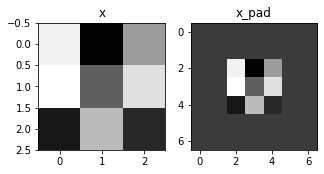

In [29]:
np.random.seed(1)
x = np.random.randn(4, 3, 3, 2)
x_pad = zero_pad(x, 2)
print ("x.shape =", x.shape)
print ("x_pad.shape =", x_pad.shape)
print ("x[1,1] =", x[1,1])
print ("x_pad[1,1] =", x_pad[1,1])

fig, axarr = plt.subplots(1, 2)
axarr[0].set_title('x')
axarr[0].imshow(x[0,:,:,0])
axarr[1].set_title('x_pad')
axarr[1].imshow(x_pad[0,:,:,0])